#####  Surface temperature time series
- Open multiple files as a single dataset
- Subsetting: bounding box/circle
- visualizations for each cell as a line over time
- and mean Surface temperature across all cells
  
Ming Ge April 2025

In [1]:
import numpy as np
import uxarray as ux
import matplotlib.pyplot as plt
import cartopy.crs as ccrs 
from matplotlib.lines import Line2D
import geoviews.feature as gf

#### Read multiple files as a single dataset using uxarray

In [2]:
dir_data = "/glade/campaign/mmm/c3we/mingge/MPAS_PROJ/mpas_tutorial/240-48km_variable/"
flnm_grid = dir_data + "SouthAmerica.init.nc"

ds = ux.open_mfdataset(flnm_grid, "/glade/derecho/scratch/duda/mpas_tutorial/240-48km_variable/diag.2014-09-1*.nc")

:Overlay
   .Path.I      :Path   [Longitude,Latitude]
   .States.I    :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
   .Borders.I   :Feature   [Longitude,Latitude]
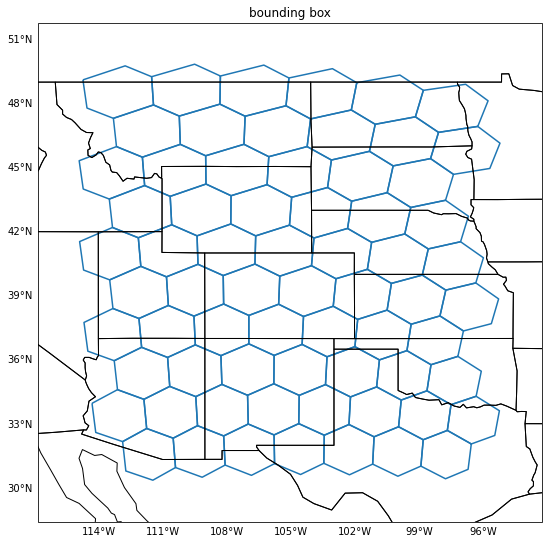

In [30]:
uxgrid = ds.uxgrid 

cenlat  = 40
cenlon  = -105
proj = ccrs.PlateCarree() #(central_latitude=cenlat, central_longitude=cenlon)
 
lon_bounds = (cenlon - 10, cenlon + 10)
lat_bounds = (cenlat - 10, cenlat + 10)

bbox_subset = uxgrid.subset.bounding_box(lon_bounds = lon_bounds, lat_bounds=lat_bounds)
bbox_subset.plot.edges(backend='matplotlib', 
                       height=500, width=750,
                       title="bounding box",
                       projection=proj , 
                       features=["borders", "coastline","states"])  


:Overlay
   .Image.I     :Image   [Longitude,Latitude]   (Longitude_Latitude temperature_surface)
   .States.I    :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
   .Borders.I   :Feature   [Longitude,Latitude]
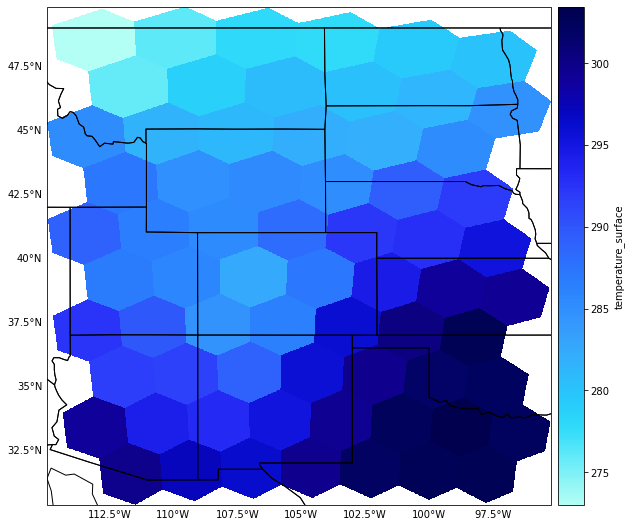

In [38]:
# Extract the Surface temperature
ts = ds["temperature_surface"]  

center_coord = [cenlon, cenlat ]
#ts_b = ts.subset.bounding_circle(center_coord, 10)
ts_b = ts.subset.bounding_box(lon_bounds = lon_bounds, lat_bounds=lat_bounds)
ts_b[1].plot(backend='matplotlib', 
                       height=500, width=750,
                       projection=proj , 
                       features=["borders", "coastline","states", ])

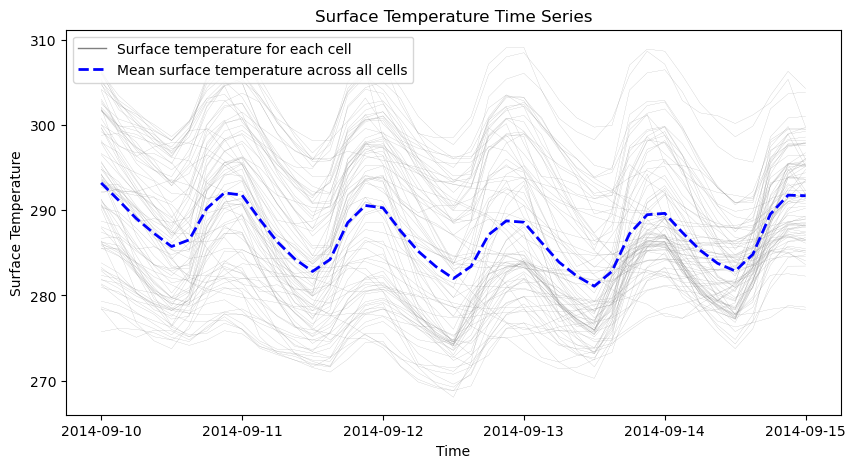

In [41]:
%matplotlib inline
ts_b = ts.subset.bounding_circle(center_coord, 10)

# Calculate and plot the mean surface temperature across all grid points for each time step
ts_mean = ts_b.mean(axis=(1))

# Create a figure and axis object for time series plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot surface temperature for each grid point as a line
for j in range(ts_b.shape[1]):
    ax.plot(ds.Time.values, ts_b[:, j], color='Grey', linewidth=0.1)

lines = ax.plot(ds.Time.values, ts_mean.values, linestyle='--', color='blue', linewidth=2)

# Set x-axis label
ax.set_xlabel('Time')

# Set y-axis label
ax.set_ylabel('Surface Temperature')

# Add a title
plt.title('Surface Temperature Time Series')

# Add legend
legend_elements = [Line2D([0], [0], color='gray', lw=1, label='Surface temperature for each cell'),
                   Line2D([0], [0], linestyle='--', color='blue', lw=2, label='Mean surface temperature across all cells')]

ax.legend(handles=legend_elements, loc='upper left')
plt.show()